In [1]:
from qiskit import *

In [2]:
sekret = '1101' # sekretna liczba
n = len(sekret) # ile cyfr ma sekratna liczba
circuit = QuantumCircuit(n+1,n) # nowy obwód kwantowy z n+1 qubitami (dodatkowy qubit dla bramek controlled NOT - cX) oraz n klasycznymi bitami

In [3]:
circuit.x(n) # zastosowanie bramki X (odpowiednik NOT) na ostatnim qubicie (qubity indeksowane są 0...n, ostatni z nich ma więc indeks n)
circuit.barrier()
circuit.h(range(n+1)) # zastoswanie bramki Hadamarda (H) (wprowadzającej qubit w stan superpozycji) na wszystkich qubitach
circuit.barrier()

In [4]:
for i, one in enumerate(reversed(sekret)):
    if one == '1':
        circuit.cx(i, n) # zastosowanie bramki cX (cX operuje na parach qubitów, jeśli qubit kontrolny jest w stanie 1, to na drugim qubicie z pary wy)
circuit.barrier()

In [5]:
circuit.h(range(n+1)) # zastosowanie bramki H na wszystkich qubitach
circuit.barrier()
circuit.measure(range(n), range(n)) # sprawdzenie stanu qubitów i zapisanie go do klasycznych bitów

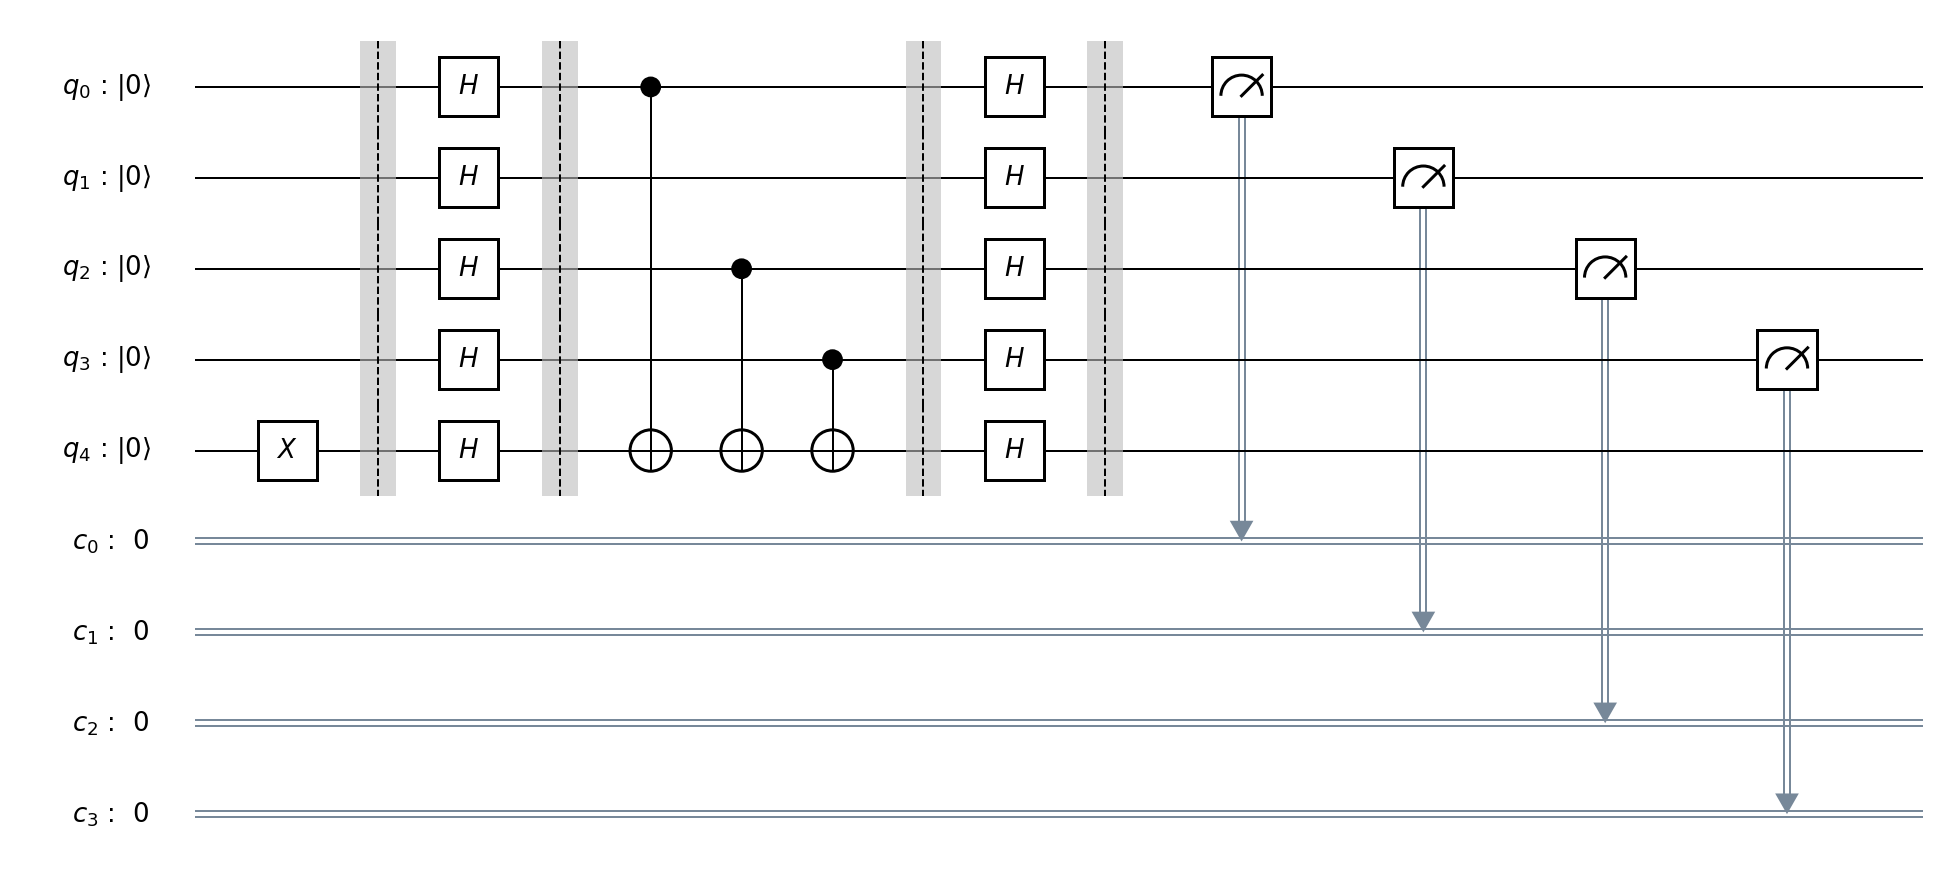

In [6]:
%matplotlib inline
circuit.draw(output='mpl') # schemat utworzonego obwodu kwantowego

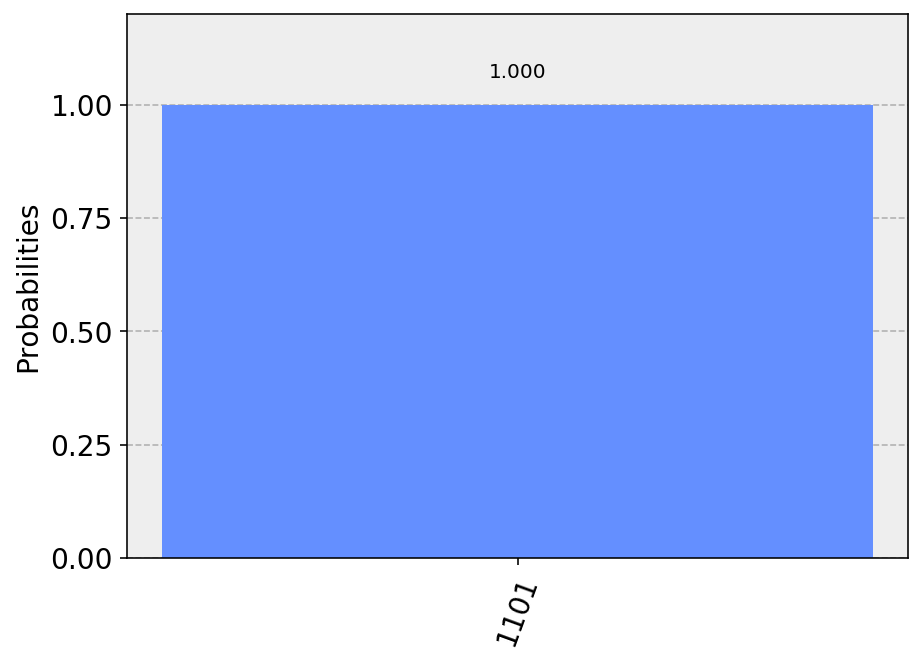

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result() # wykonanie programu na symulatorze
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit)) # wyświetlenie wyników